# 4: Clasificación binaria

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train1 = pd.read_csv('df_train1_kpi.csv')
df_train3 = pd.read_csv('df_train3_kpi.csv')
df_train2 = pd.read_csv('df_train2_kpi.csv')
df_train4 = pd.read_csv('df_train4_kpi.csv')

In [3]:
df_test1 = pd.read_csv('df_test1_kpi.csv')
df_test3 = pd.read_csv('df_test3_kpi.csv')
df_test2 = pd.read_csv('df_test2_kpi.csv')
df_test4 = pd.read_csv('df_test4_kpi.csv')

In [4]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,rul,rul_norm,label
0,0,1.0,1.0,0,-0.978417,-0.869179,-0.292733,0.365199,191.0,0.005208,0
1,1,1.0,2.0,1,-0.688356,-0.965539,-0.216275,1.225379,190.0,0.010417,0
2,2,1.0,3.0,2,-0.567306,-0.562371,-1.057313,1.419613,189.0,0.015625,0
3,3,1.0,4.0,3,-0.833386,-0.719638,-1.038198,1.260064,188.0,0.020833,0
4,4,1.0,5.0,4,-0.336628,-0.461920,-1.019084,1.100514,187.0,0.026042,0


In [5]:
df_test2.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure11,sensorMeasure13,sensorMeasure14,sensorMeasure15,RUL,label
0,0,1.0,258.0,11452.0,1.024747,0.713939,0.923302,0.419304,1.233734,-0.761926,18,1
1,1,2.0,55.0,792.0,1.806852,1.835699,1.400457,0.417740,0.888502,-1.191033,79,0
2,2,3.0,165.0,5073.0,-0.567018,-0.663018,-0.309863,0.417349,0.090557,-0.007777,106,0
3,3,4.0,86.0,3152.0,0.457027,0.376125,0.486427,0.417740,-0.014897,-0.107430,110,0
4,4,5.0,148.0,1926.0,-0.527115,-1.081612,-0.148746,0.425090,0.922143,0.108595,15,1


In [6]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [7]:
df_train2.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure11,sensorMeasure13,sensorMeasure14,sensorMeasure15,rul,rul_norm,label
0,1.0,1.0,1423,-0.583859,-0.669937,-0.305175,0.408202,-0.236620,0.022739,148.0,0.006711,0
1,1.0,2.0,1424,-0.682747,-1.092353,-0.247764,0.407709,0.054488,0.066069,147.0,0.013423,0
2,1.0,3.0,1425,-1.359244,-0.481786,-2.005164,-2.551520,-2.489093,2.165707,146.0,0.020134,0
3,1.0,4.0,1426,-0.677565,-1.092353,-0.324311,0.407297,0.009853,0.032014,145.0,0.026846,0
4,1.0,5.0,1427,-1.355098,-0.479942,-1.941375,-2.551767,-2.533728,2.168753,144.0,0.033557,0


In [8]:
df_test1.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,RUL,label
0,1.0,31.0,372.0,-0.871242,-0.175323,-0.950497,0.075254,112,0
1,2.0,49.0,50.0,0.912006,-1.192854,1.295920,-0.014081,98,0
2,3.0,126.0,831.0,2.117793,-0.800015,2.368073,-1.639976,69,0
3,4.0,106.0,268.0,0.321081,-0.621532,1.193810,0.236057,82,0
4,5.0,98.0,392.0,2.188106,-0.386178,0.223766,-1.336237,91,0


In [9]:
caracteristicas1 = df_train1.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas3 = df_train3.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas2 = df_train2.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas4 = df_train4.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

In [10]:
def variables(df_train, df_test, caracteristicas):
    X_train = df_train[caracteristicas]
    X_test = df_test[caracteristicas]

    y_train = df_train['label']
    y_test = df_test['label']
    
    return X_train, y_train, X_test, y_test

In [11]:
X_train, y_train, X_test, y_test = variables(df_train1, df_test1, caracteristicas1)

## GridSearch para la Clasificación.

In [12]:
def gridsearch(modelo, clasif, params=None, score=None):
    
    """Realiza la busqueda de los mejores hiperparametros para cada modelo de regresión empleando GridSearchCV.
    
    Args:
        modelo (str): identificador del modelo.
        clasif (classifier object): Clasificador a ser optimizado
        features (list): atributos.
        params (dict): parametros del Grid Search.
        score (str): score del Grid Search.
        
    Returns:
        objetos del clasificador optimizados.
        dataframe con las predicciones y el score.
    
    """
    
    gridsearch = model_selection.GridSearchCV(estimator=clasif, param_grid= params, scoring= score, cv=5, n_jobs=-1)
    gridsearch.fit(X_train, y_train)
    y_pred = gridsearch.predict(X_test)
    
    if hasattr(gridsearch, 'predict_proba'):   
        y_score = gridsearch.predict_proba(X_test)[:,1]
    elif hasattr(gridsearch, 'decision_function'):
        y_score = gridsearch.decision_function(X_test)
    else:
        y_score = y_pred
      
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return gridsearch.best_estimator_, df_predictions

## Metricas de clasificación.

In [13]:
def metricas(modelo, y_test, y_pred, y_score):
    
    metricas_clasbin = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }
    
    df_metricas = pd.DataFrame.from_dict(metricas_clasbin, orient='index')
    df_metricas.columns = [modelo] 
    
    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)
    
    roc_thresh = {
                  'Threshold' : thresh_roc,
                  'TPR' : tpr, 
                  'FPR' : fpr
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)
    
    thresh_prc = np.append(thresh_prc,1)
    
    prc_thresh = {
                  'Threshold' : thresh_prc, 
                  'Precision' : precision, 
                  'Recall' : recall
                 }
    
    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)
    print('\n')
    print('-----------------------------------------------------------')
    print(modelo, '\n')
    
    print('Matriz de confusión:\n')
    print(metrics.confusion_matrix(y_test, y_pred))
    
    print('\nReporte de clasificación:\n')
    print(metrics.classification_report(y_test, y_pred))
    
    print('\nMetricas:')
    print(df_metricas)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
    fig.set_size_inches(10,5)

    ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([-0.05, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.legend(loc="lower right")

    ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.legend(loc="lower left")
    
    return df_metricas, df_roc_thresh, df_prc_thresh

### Regresión Logística


Mejores parametros:
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


-----------------------------------------------------------

Seguridad que tiene el algoritmo en terminos
de probabilidad en clasificar la clase positiva (1) (ver y_score):

    y_pred   y_score
0        0  0.000882
1        0  0.068911
2        1  0.929882
3        0  0.037463
4        0  0.382549
5        0  0.090555
6        0  0.014567
7        1  0.592361
8        0  0.093982
9        0  0.015083
10       0  0.416320
11       0  0.026012
12       0  0.266620
13       0  0.140597
14       0  0.000624
15       0  0.004341
16       1  0.647733
17       1  0.771889
18       0  0.012698
19       1  0.997587
20       0  0.048817
21       0  0.013722
22       0  0.001013
23       1  0.999463
24       0  

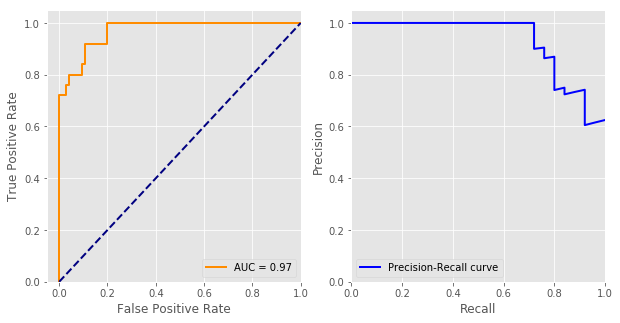

In [14]:
modelo = 'Logistic Regression'
clf_lgr = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgr, pred_lgr = gridsearch(modelo, clf_lgr, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_lgr)
print('\n')
print('-----------------------------------------------------------')
print('\nSeguridad que tiene el algoritmo en terminos')
print('de probabilidad en clasificar la clase positiva (1) (ver y_score):\n')
print(pred_lgr)

metricas_lgr, roc_lgr, prc_lgr = metricas(modelo, y_test, pred_lgr.y_pred, pred_lgr.y_score)

### Árboles de decisión


Mejores parametros:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')


-----------------------------------------------------------

Seguridad que tiene el algoritmo en terminos
de probabilidad en clasificar la clase positiva (1) (ver y_score):

    y_pred   y_score
0        0  0.000000
1        0  0.143064
2        1  0.946524
3        0  0.143064
4        0  0.219368
5        0  0.030713
6        0  0.000000
7        1  0.860465
8        0  0.085960
9        0  0.143064
10       1  0.860465
11       0  0.000000
12       0  0.219368
13       0  0.144860
14       0  0.000000
15       0  0.000000
16       1  0.888889
17       1  0.522088
18       0  0.000000
19       1  1.000000
20       0  

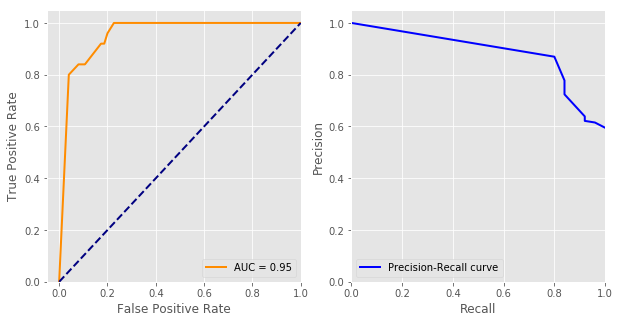

In [15]:
modelo = 'Decision Tree'
clf_dt = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dt, pred_dt = gridsearch(modelo, clf_dt, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_dt)
print('\n')
print('-----------------------------------------------------------')
print('\nSeguridad que tiene el algoritmo en terminos')
print('de probabilidad en clasificar la clase positiva (1) (ver y_score):\n')
print(pred_dt)

metricas_dt, roc_dt, prc_dt = metricas(modelo, y_test, pred_dt.y_pred, pred_dt.y_score)

### Bosques aleatorios


Mejores parametros:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)


-----------------------------------------------------------

Seguridad que tiene el algoritmo en terminos
de probabilidad en clasificar la clase positiva (1) (ver y_score):

    y_pred   y_score
0        0  0.000405
1        0  0.266052
2        1  0.976339
3        0  0.090785
4        0  0.339301
5        0  0.108609
6        0  0.045934
7        1  0.589092
8        0  0.098806
9        0  0.039778
10       1  0.741900
11       0  0.025114
12       0  0.197634
13       0  0.225877
14       0  0.000157
15       0  0.000405
16       1  0.819949
17       1  0

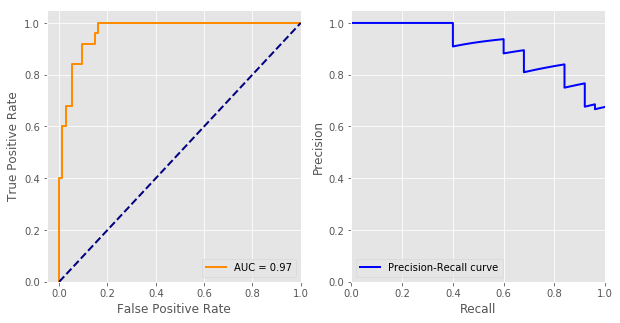

In [16]:
modelo = 'Random Forest'
clf_rfc = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8,12], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfc, pred_rfc = gridsearch(modelo, clf_rfc, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_rfc)
print('\n')
print('-----------------------------------------------------------')
print('\nSeguridad que tiene el algoritmo en terminos')
print('de probabilidad en clasificar la clase positiva (1) (ver y_score):\n')
print(pred_rfc)

metricas_rfc, roc_rfc, prc_rfc = metricas(modelo, y_test, pred_rfc.y_pred, pred_rfc.y_score)

### Vectores lineales soportados - Clasificador


Mejores parametros:
 LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)


-----------------------------------------------------------

Seguridad que tiene el algoritmo en terminos
de probabilidad en clasificar la clase positiva (1) (ver y_score):

    y_pred   y_score
0        0 -2.485240
1        0 -0.817592
2        1  0.192137
3        0 -1.185269
4        0 -0.471508
5        0 -0.926142
6        0 -1.710638
7        0 -0.382382
8        0 -1.084106
9        0 -1.518962
10       0 -0.285719
11       0 -1.557498
12       0 -0.813527
13       0 -0.811318
14       0 -2.414793
15       0 -1.716400
16       1  0.133124
17       1  0.333605
18       0 -1.478285
19       1  1.914489
20       0 -2.018676
21       0 -1.900474
22       0 -2.254272
23       1  2.301916
24       0 -2.006783
25       0 -1.447971
26       0 -2.158671

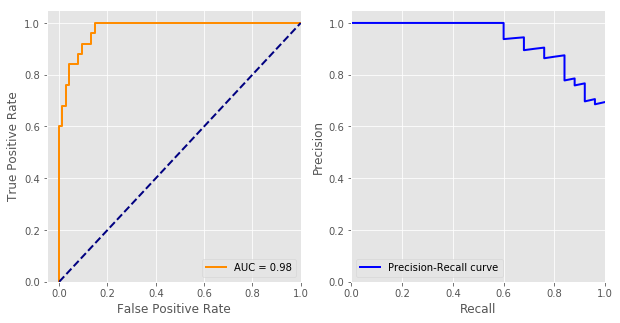

In [17]:
modelo = 'Linear Support Vector Classification'
clf_svl = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svl, pred_svl = gridsearch(modelo, clf_svl, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_svl)
print('\n')
print('-----------------------------------------------------------')
print('\nSeguridad que tiene el algoritmo en terminos')
print('de probabilidad en clasificar la clase positiva (1) (ver y_score):\n')
print(pred_svl)


metricas_svl, roc_svl, prc_svl = metricas(modelo, y_test, pred_svl.y_pred, pred_svl.y_score)

### K vecinos más próximos


Mejores parametros:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
           weights='uniform')


-----------------------------------------------------------

Seguridad que tiene el algoritmo en terminos
de probabilidad en clasificar la clase positiva (1) (ver y_score):

    y_pred   y_score
0        0  0.000000
1        0  0.166667
2        0  0.166667
3        0  0.083333
4        0  0.250000
5        0  0.166667
6        0  0.000000
7        0  0.500000
8        0  0.083333
9        0  0.000000
10       0  0.416667
11       0  0.000000
12       0  0.250000
13       0  0.250000
14       0  0.000000
15       0  0.000000
16       1  0.666667
17       1  0.583333
18       0  0.000000
19       0  0.500000
20       0  0.000000
21       0  0.000000
22       0  0.000000
23       1  0.750000
24       0  0.000000
25       0  0.000000
26       0  0.000000
27       0  0.000000
28       0  0.083333
29    

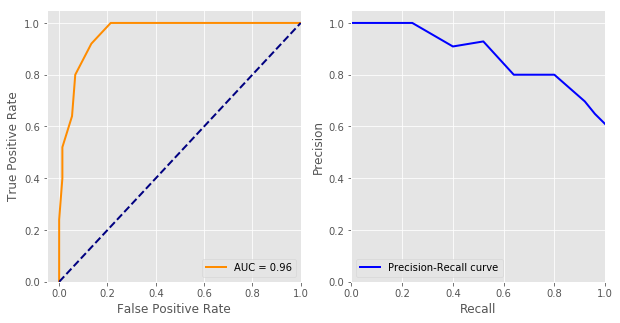

In [18]:
modelo = 'KNN'
clf_knn = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knn, pred_knn = gridsearch(modelo, clf_knn, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_knn)
print('\n')
print('-----------------------------------------------------------')
print('\nSeguridad que tiene el algoritmo en terminos')
print('de probabilidad en clasificar la clase positiva (1) (ver y_score):\n')
print(pred_knn)

metricas_knn, roc_knn, prc_knn = metricas(modelo, y_test, pred_knn.y_pred, pred_knn.y_score)

In [20]:
#comparando todas las metricas
metricas_bc = pd.concat([metricas_lgr, metricas_dt, metricas_rfc, metricas_svl, metricas_knn], axis=1)
metricas_bc

,Logistic Regression,Decision Tree,Random Forest,Linear Support Vector Classification,KNN
Accuracy,0.850000,0.840000,0.850000,0.890000,0.900000
Precision,0.625000,0.615385,0.625000,0.705882,0.800000
Recall,1.000000,0.960000,1.000000,0.960000,0.800000
F1 Score,0.769231,0.750000,0.769231,0.813559,0.800000
ROC AUC,0.969067,0.954133,0.966933,0.975467,0.957867


Text(0.5, 1.0, 'Precision Recall Curve')

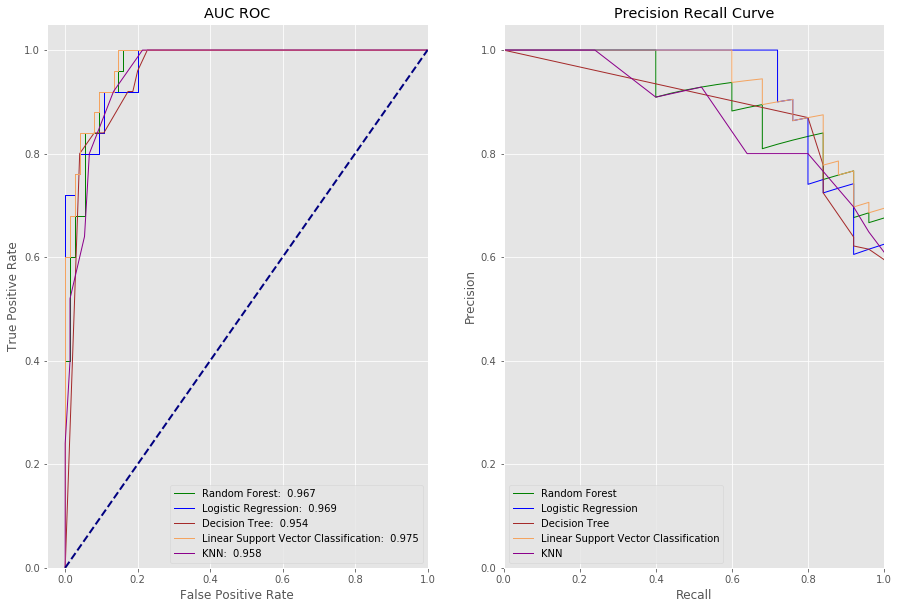

In [22]:
# Graficando las curvas ROC y Precisión-Recall de todos los algoritmos.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(15,10)

ax1.plot(roc_rfc.FPR, roc_rfc.TPR, color='green', lw=1, label= metricas_rfc.columns.values.tolist()[0] + ':  %.3f' % metricas_rfc.at['ROC AUC', metricas_rfc.columns.values.tolist()[0]])
ax1.plot(roc_lgr.FPR, roc_lgr.TPR, color='blue', lw=1, label= metricas_lgr.columns.values.tolist()[0] + ':  %.3f' % metricas_lgr.at['ROC AUC', metricas_lgr.columns.values.tolist()[0]])
ax1.plot(roc_dt.FPR, roc_dt.TPR, color='brown', lw=1, label= metricas_dt.columns.values.tolist()[0] + ':  %.3f' % metricas_dt.at['ROC AUC', metricas_dt.columns.values.tolist()[0]])
ax1.plot(roc_svl.FPR, roc_svl.TPR, color='sandybrown', lw=1, label= metricas_svl.columns.values.tolist()[0] + ':  %.3f' % metricas_svl.at['ROC AUC', metricas_svl.columns.values.tolist()[0]])
ax1.plot(roc_knn.FPR, roc_knn.TPR, color='darkmagenta', lw=1, label= metricas_knn.columns.values.tolist()[0] + ':  %.3f' % metricas_knn.at['ROC AUC', metricas_knn.columns.values.tolist()[0]])
#ax1.plot(roc_svc.FPR, roc_svc.TPR, color='red', lw=1, label= metricas_svc.columns.values.tolist()[0] + ':  %.3f' % metricas_svc.at['ROC AUC', metricas_svc.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right")
ax1.set_title('AUC ROC')

ax2.plot(prc_rfc.Recall, prc_rfc.Precision, color='green', lw=1, label= metricas_rfc.columns.values.tolist()[0])
ax2.plot(prc_lgr.Recall, prc_lgr.Precision, color='blue', lw=1, label= metricas_lgr.columns.values.tolist()[0])
ax2.plot(prc_dt.Recall, prc_dt.Precision, color='brown', lw=1, label= metricas_dt.columns.values.tolist()[0])
ax2.plot(prc_svl.Recall, prc_svl.Precision, color='sandybrown', lw=1, label= metricas_svl.columns.values.tolist()[0])
ax2.plot(prc_knn.Recall, prc_knn.Precision, color='darkmagenta', lw=1, label= metricas_knn.columns.values.tolist()[0])
#ax2.plot(prc_svc.Recall, prc_svc.Precision, color='red', lw=1, label= metricas_svc.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left")
ax2.set_title('Precision Recall Curve')